In [3]:
import os
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
from PIL import Image
import pickle
import gzip
import eventsummary
import h5py

In [2]:
#Sample game and game event data
gamedata = './data/0021500507.json'
eventdata = './game_eventdata.csv'

with open(gamedata,'r') as f:
    data = json.load(f)
hometeam = data['events'][0]['home']['abbreviation']
visitorteam = data['events'][0]['visitor']['abbreviation']

In [3]:
def eventsearcher(eventid,attacker):
    '''
    paras
    eventid : id of the event
    attacker : Between home and visitor which team attacks

    return
    Moment in event dictionary. Key is moment, value = ball_loc, attacker_loc, defender_loc
    '''

    momentdict={}
    count = 0

    for loc in data['events'][eventid]['moments']:   
        locations = loc[5]
        ball_loc= (locations[0][2],locations[0][3])
        home_player = [(x[2],x[3]) for x in locations[1:6]]
        visit_player = [(x[2],x[3]) for x in locations[6:11]]

        if attacker == hometeam:
            momentdict[count] = (ball_loc,home_player,visit_player)
        else:
            momentdict[count] = (ball_loc,visit_player,home_player)
        count +=1
    return momentdict

In [25]:
def draw_all_position_jpg(momentdict,eventid,momentsize=0):
    '''
    Plot jpg 3 file which records ball, attacker team, and defender team location by each.
    However, jpg file has 3 channel 'RGB', these jpg files will be converted to 277*515*1 array only to get location

    For the radius of the player circle, assume average of nba player arm span is 210cm. And take the half of it as circle diameter.
    Since court width size in axis is 100, So relative radius of circle is approximately 3.75.   
    '''

    count =0
    if momentsize ==1:
        testround =True
    else:
        testround =False
        
    for moment in momentdict.keys():
        try:
            os.makedirs('./data/event_'+str(eventid)+'/')
        except:
            pass

        fig =plt.figure(1)
        ax1 = plt.subplot()
        img  = mpimg.imread('./img/nba_court_T.png')
        axis =[0,100,0,50]
        ax1.imshow(img,extent=axis,zorder =0)
        ax1 = plt.gca()
        plt.cla()

        ball_circle = plt.Circle(momentdict[moment][0],2,color = 'green')
        ax1.add_patch(ball_circle)
        plt.axis('off')
        dx =2
        plt.xlim([0-dx,100+dx])
        plt.ylim([0-dx,50+dx])
        plt.savefig('./data/event_'+str(eventid)+'/ball_loc'+str(moment)+'.jpg', bbox_inches='tight')
        plt.cla()

        for attack in momentdict[moment][1]:
            att_circle = plt.Circle(attack,3.75,color = 'blue')
            ax1.add_patch(att_circle)
        
        plt.axis('off')
        dx =2
        plt.xlim([0-dx,100+dx])
        plt.ylim([0-dx,50+dx])
        plt.savefig('./data/event_'+str(eventid)+'/attacker_loc'+str(moment)+'.jpg', bbox_inches='tight')
        plt.cla()
        
        for defender in momentdict[moment][2]:
            def_circle = plt.Circle(defender,3.75,color = 'red')
            ax1.add_patch(def_circle)
    
        plt.axis('off')
        dx =2
        plt.xlim([0-dx,100+dx])
        plt.ylim([0-dx,50+dx])
        plt.savefig('./data/event_'+str(eventid)+'/defender_loc'+str(moment)+'.jpg', bbox_inches='tight')
        
        plt.cla()
        plt.clf()

        count +=1
        if testround ==True:
            if count > momentsize:
                break


In [56]:
def jpg_to_array(eventid,momentsize,testround=False):
    '''
    With saved jpg file,ball attacker, and defender location, convert jpg to numpy array with bascketball court image.
    And save array into compressed pickle file.
    
    Array is (4, 277, 515) which is consist of court array, ball location array, attacker location array, and defender location array.
    So it is 4 channel array.    
    '''
    
    courtjpg = Image.open('./data/nba_court.jpg')
    courtarr = np.array(courtjpg)[:,:,0]
    for moment in range(momentsize):
        balljpg = Image.open('./data/event_'+str(eventid)+'/ball_loc'+str(moment)+'.jpg')
        attjpg = Image.open('./data/event_'+str(eventid)+'/attacker_loc'+str(moment)+'.jpg')
        defjpg = Image.open('./data/event_'+str(eventid)+'/defender_loc'+str(moment)+'.jpg')
       
        ball2arr = np.array(balljpg)[:,:,0]
        att2arr = np.array(attjpg)[:,:,1]
        def2arr = np.array(defjpg)[:,:,2]

        allarr = np.array([courtarr,ball2arr,att2arr,def2arr])

        if testround==True:
            display(courtjpg)
            display(balljpg)
            display(attjpg)
            display(defjpg)
            print(allarr)
            print(allarr.shape)
            
        try:
            os.makedirs('./data/event_'+str(eventid))
        except:
            pass

        with gzip.open('./data/event_'+str(eventid)+'/moment'+str(moment)+'.pkl','wb')  as f:
            pickle.dump(allarr,f)

In [51]:
make_eventdict, miss_eventdict = eventsummary.get_eventdict(eventdata,gamedata)

In [52]:
events = make_eventdict['Q1'][0]
draw_all_position_jpg(eventsearcher(events[0],events[1]),events[0],1)

<Figure size 432x288 with 0 Axes>

## Plot example images and output array

4 plotted images are  
- Bascketball court image  
- Green circle : ball  
- Blue circle : attacker  
- Red circle : Defender  

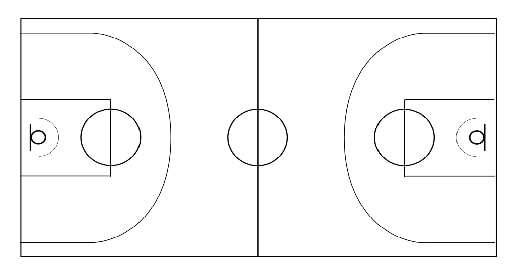

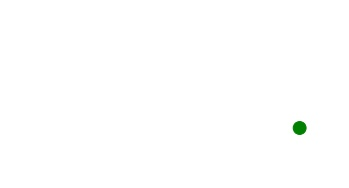

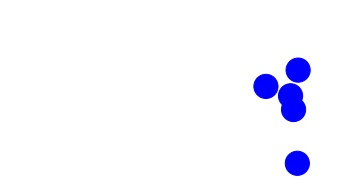

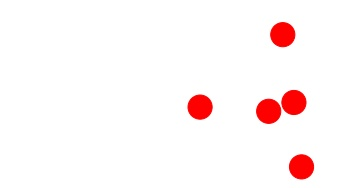

[array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
 array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
 array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ...,
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)
 array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 

In [57]:
jpg_to_array(events[0],1,True)

## Basic analysis
How many moments are in each events?

In [8]:
import pickle
import os
import gzip
import numpy as np
import torch
import torch.nn as NN
from torch.utils.data import DataLoader,Dataset

## Original plan
  
Try to use 20 games data  
  
-> Memory error problem occured. The size of the data is beyond the capability of local machine. It would be better to use less number of data


In [10]:
make_dir = './data/game_data/event_make/'
miss_dir = './data/game_data/event_miss/'

make_eventsize=[]
for names in os.listdir(make_dir):
    for events in os.listdir(make_dir+names):
        momentslist= sorted([x.split('.')[0] for x in os.listdir(make_dir+names+'/'+events)],key=lambda x: int(x[6:]))
        make_eventsize.append(len(momentslist))

miss_eventsize=[]
for names in os.listdir(miss_dir):
    for events in os.listdir(miss_dir+names):
        momentslist= sorted([x.split('.')[0] for x in os.listdir(miss_dir+names+'/'+events)],key=lambda x: int(x[6:]))
        miss_eventsize.append(len(momentslist))
eventsize = make_eventsize+miss_eventsize

In [101]:
print('Event "Make" view')
print('Number of events:', len(make_eventsize),'Number of moments:', sum(make_eventsize))
print('Moment size per event Average:',round(np.mean(make_eventsize),2),'Moment size per event Std.:',round(np.std(make_eventsize),2))
print('\n')
print('Event "Miss" view')
print('Number of events:',len(miss_eventsize),'Number of moments:', sum(miss_eventsize))
print('Moment size per event Average:',round(np.mean(miss_eventsize),2),'Moment size per event Std.:',round(np.std(miss_eventsize),2))
print('\n')
print('All Event view')
print('Number of events',len(eventsize),'Number of moments:', sum(eventsize))
print('Moment size per event Average:',round(np.mean(eventsize),2),'Moment size per event Std.:',round(np.std(eventsize),2))

Event "Make" view
Number of events: 1387 Number of moments: 676106
Moment size per event Average: 487.46 Moment size per event Std.: 208.91


Event "Miss" view
Number of events: 1774 Number of moments: 904031
Moment size per event Average: 509.6 Moment size per event Std.: 219.67


All Event view
Number of events 3161 Number of moments: 1580137
Moment size per event Average: 499.89 Moment size per event Std.: 215.29


## Use less number of data
5 games data will be used for training

In [117]:
make_dir = './data/game_data/event_make/'
miss_dir = './data/game_data/event_miss/'
make_dir_few = sorted(os.listdir(make_dir))[:5]
miss_dir_few = sorted(os.listdir(miss_dir))[:5]

make_eventsize=[]

for events in make_dir_few:
    for moment in os.listdir(make_dir+'/'+events):        
        momentslist= sorted([x.split('.')[0] for x in os.listdir(make_dir+events+'/'+moment)],key=lambda x: int(x[6:]))
        make_eventsize.append(len(momentslist))

miss_eventsize=[]

for events in miss_dir_few:
    for moment in os.listdir(miss_dir+'/'+events):        
        momentslist= sorted([x.split('.')[0] for x in os.listdir(miss_dir+events+'/'+moment)],key=lambda x: int(x[6:]))
        miss_eventsize.append(len(momentslist))
eventsize = make_eventsize+miss_eventsize


In [118]:
print('Event "Make" view')
print('Number of events:', len(make_eventsize),'Number of moments:', sum(make_eventsize))
print('Moment size per event Average:',round(np.mean(make_eventsize),2),'Moment size per event Std.:',round(np.std(make_eventsize),2))
print('\n')
print('Event "Miss" view')
print('Number of events:',len(miss_eventsize),'Number of moments:', sum(miss_eventsize))
print('Moment size per event Average:',round(np.mean(miss_eventsize),2),'Moment size per event Std.:',round(np.std(miss_eventsize),2))
print('\n')
print('All Event view')
print('Number of events',len(eventsize),'Number of moments:', sum(eventsize))
print('Moment size per event Average:',round(np.mean(eventsize),2),'Moment size per event Std.:',round(np.std(eventsize),2))

Event "Make" view
Number of events: 356 Number of moments: 178694
Moment size per event Average: 501.95 Moment size per event Std.: 212.79


Event "Miss" view
Number of events: 457 Number of moments: 235803
Moment size per event Average: 515.98 Moment size per event Std.: 213.42


All Event view
Number of events 813 Number of moments: 414497
Moment size per event Average: 509.84 Moment size per event Std.: 213.26


## Resize the array  
Origianl size of each moment array is (4, 277, 515)  
For saving memory usage, resizing array is required from original 277 * 515 to 28 * 52, i.e. 90% reduction of array size.
Modified size of moment would be (4,28,52).

In [4]:
with gzip.open('./data/game_data/event_make/0021500296/event_2/moment10.pkl','r') as f:
    data = pickle.load(f)
print(data.shape)

(4, 277, 515)


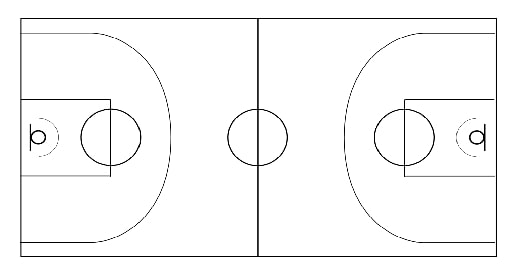

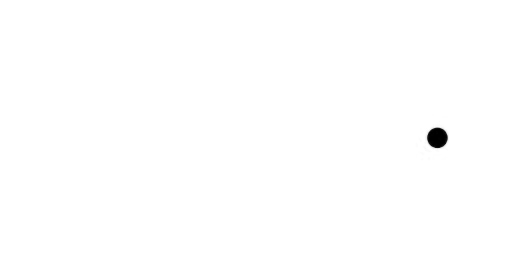

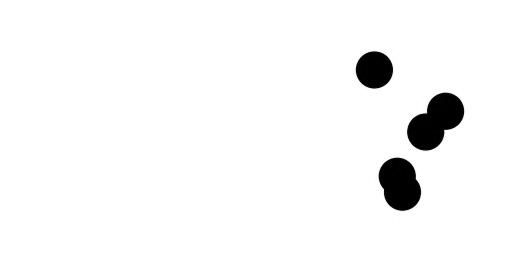

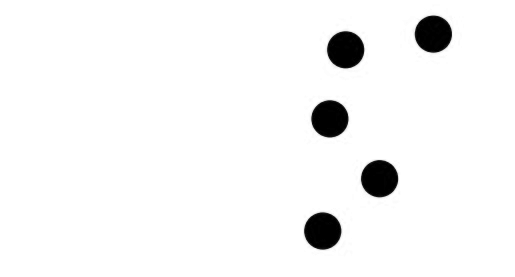

(4, 28, 52)


In [5]:
moment =[]
for x in data:
    oimg = Image.fromarray(x)
    resize = oimg.resize((52,28))
    display(oimg)
    display(resize)
    moment.append(np.array(resize))
print(np.array(moment).shape)

## Construct input data per seconds
By chaing of seconds, split events to train, validation, and test in proportion of 60%, 20%, 20%.  


In [57]:
seconds = 10
moment_size = 25* seconds
step = 12
moment_step = [x for x in range(0,moment_size,step)]
print(moment_step)

[0, 12, 24, 36, 48, 60, 72, 84, 96, 108, 120, 132, 144, 156, 168, 180, 192, 204, 216, 228, 240]


In [58]:
make_dir = './data/game_data/event_make/'
miss_dir = './data/game_data/event_miss/'
make_dir_few = sorted(os.listdir(make_dir))[:5]
miss_dir_few = sorted(os.listdir(miss_dir))[:5]

x_data = []
y_data=[]

for game in make_dir_few:
    for event in os.listdir(make_dir+'/'+game):
        momentslist= sorted([x.split('.')[0] for x in os.listdir(make_dir+game+'/'+event)],key=lambda x: int(x[6:]))
        if len(momentslist) < moment_size:
            pass
        else:
            x_event=[]
            for moment in moment_step:
                moment_name = make_dir+game+'/'+event+'/'+'moment'+str(moment)+'.pkl'
                with gzip.open(moment_name,'r') as f:
                    data = pickle.load(f)
                moment_d =[]
                for ply in data:
                    oimg = Image.fromarray(ply)
                    resize = oimg.resize((52,28))
                    moment_d.append(np.array(resize))
                x_event.append(np.array(moment_d))
            x_data.append(np.array(x_event))
            y_data.append(1)

for game in miss_dir_few:
    for event in os.listdir(miss_dir+'/'+game):
        momentslist= sorted([x.split('.')[0] for x in os.listdir(miss_dir+game+'/'+event)],key=lambda x: int(x[6:]))
        if len(momentslist) < moment_size:
            pass
        else:
            x_event=[]
            for moment in moment_step:
                moment_name = miss_dir+game+'/'+event+'/'+'moment'+str(moment)+'.pkl'
                with gzip.open(moment_name,'r') as f:
                    data = pickle.load(f)
                moment_d =[]
                for ply in data:
                    oimg = Image.fromarray(ply)
                    resize = oimg.resize((52,28))
                    moment_d.append(np.array(resize))
                x_event.append(np.array(moment_d))
            x_data.append(np.array(x_event))
            y_data.append(0)

In [59]:
x_data = np.array(x_data)
y_data = np.array(y_data)

In [60]:
data_idx = np.random.permutation([x for x in range(len(x_data))])
train_idx,valid_idx,test_idx = np.split(data_idx,[int(len(data_idx)*0.6),int(len(data_idx)*0.8)])
train_data = x_data[train_idx]
train_label = y_data[train_idx]
train = [train_data,train_label]

valid_data = x_data[valid_idx]
valid_label = y_data[valid_idx]
valid = [valid_data,valid_label]

test_data = x_data[test_idx]
test_label = y_data[test_idx]
test = [test_data,test_label]

In [61]:
dirname = './data/game_data/seconds_'+str(seconds) 
try:
    os.makedirs(dirname)
except:
    pass

with h5py.File(dirname+'/testset.hdf5','w') as f:
    f['image'] = test[0]
    f['label'] = test[1]

with h5py.File(dirname+'/trainset.hdf5','w') as f:
    f['image'] = train[0]
    f['label'] = train[1]
with h5py.File(dirname+'/validset.hdf5','w') as f:
    f['image'] = valid[0]
    f['label'] = valid[1]